# All Sites- Analysis 5 

## Creating PDFs using the scripts from data analysis 
* Created density histograms in the AllSites_Analysis_2_hist.ipynb notebook, but the shortwave looked weird so we just want to be sure 

In [112]:
# import packages 
%matplotlib widget

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

# interactive plotting
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots # adding for subplots
import plotly.figure_factory as ff

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime

import csv 
import copy 
import os.path 

# Import All Data

## Sodankyla Data

In [113]:
# OPEN MET DATA 
sod =  pd.read_csv("/Users/Lumbr/OneDrive - UW/Documents/Washington/UnloadingRegimes/OtherSites/Sodankyla/SOD_1819_1hr_cleaned.csv")
sod['datetime'] = pd.to_datetime(sod['datetime'])

# OPEN CLASSIFICATIONS
sodobs = pd.read_csv("/Users/Lumbr/OneDrive - UW/Documents/Washington/UnloadingRegimes/OtherSites/Classifications/datetimeformat_classifications_sodankyla2019.csv")
sodobs['datetime'] = pd.to_datetime(sodobs['datetime'])
sodobs.dropna(axis=0, how='all', inplace=True) #removing row is entire row is NAN #careful with this, without datetime a lot gets removed 

# MERGE
soddf = pd.merge(sod, sodobs, how='outer', on='datetime')
soddf.index = pd.DatetimeIndex(soddf['datetime'])
soddf.drop(columns=['datetime'], inplace=True)

# Create seperate df for only snow in the canopy timesteps 
sod_df_unload = soddf.copy(deep=True)
sod_df_unload = sod_df_unload.dropna(axis=0, how='any', subset=['CD'])

# Have to remove all nans for this plotting to work.... need to come back to this 
sod_df_unload.dropna(inplace=True)

# Create sunlit column
sod_df_unload['Sunlit'] = sod_df_unload.E.copy(deep=True)
sod_df_unload.Sunlit.mask(sod_df_unload.Sunlit == 0, "Not Sunlit", inplace=True)
sod_df_unload.Sunlit.mask(sod_df_unload.Sunlit == 1, "Sunlit Canopy", inplace=True)

# Create unloading classification column
sod_df_unload['Classification'] = sod_df_unload.CD.copy(deep=True)
sod_df_unload.Classification.mask(sod_df_unload.Classification == 0, "Snow Unloading", inplace=True)
sod_df_unload.Classification.mask(sod_df_unload.Classification == 1, "Snow Staying", inplace=True)

sod_df_snowstay   = sod_df_unload.where(sod_df_unload.CD == 1).dropna() # where CD == 1, meaning Snow Staying, make that snowstaydf
sod_df_snowunload = sod_df_unload.where(sod_df_unload.CD == 0).dropna() # where CD == 0, meaning Snow Unloading, make that snowunloaddf

## Laret

In [114]:
# Open met dataset
opn  = pd.read_csv("/Users/Lumbr/OneDrive - UW/Documents/Washington/UnloadingRegimes/MetStations/Cleaned/opnc_hcass.csv")
opn['datetime'] = pd.to_datetime(opn['datetime'])

# Open observations classifications 
obs = pd.read_csv("/Users/Lumbr/OneDrive - UW/Documents/Washington/UnloadingRegimes/Excel/Datetime/datetimeformat_ccg_classifications_only_cutdates.csv")
obs['datetime'] = pd.to_datetime(obs['datetime'])
obs.dropna(axis=0, how='all', inplace=True) #removing row is entire row is NAN #careful with this, without datetime a lot gets removed

# Merge them
opndf = pd.merge(opn, obs, how='outer', on='datetime')
opndf.index = pd.DatetimeIndex(opndf['datetime'])

# Create seperate df for only snow in the canopy timesteps 
opn_df_unload = opndf.copy(deep=True)
opn_df_unload = opn_df_unload.dropna(axis=0, how='any', subset=['CD'])

# Have to remove all nans for this plotting to work.... need to come back to this 
opn_df_unload.dropna(inplace=True)

# SPECIAL FOR LARET BECAUSE OF NAMES 
opn_df_unload['temp'] = opn_df_unload['AirTC_Avg'].copy(deep=True)
opn_df_unload['shortwave'] = opn_df_unload['SWR_Avg'].copy(deep=True)
opn_df_unload['windspeed'] = opn_df_unload['WS_ms_Avg'].copy(deep=True)

# Create sunlit column
opn_df_unload['Sunlit'] = opn_df_unload.E.copy(deep=True)
opn_df_unload.Sunlit.mask(opn_df_unload.Sunlit == 0, "Not Sunlit", inplace=True)
opn_df_unload.Sunlit.mask(opn_df_unload.Sunlit == 1, "Sunlit Canopy", inplace=True)

# Create unloading classification column
opn_df_unload['Classification'] = opn_df_unload.CD.copy(deep=True)
opn_df_unload.Classification.mask(opn_df_unload.Classification == 0, "Snow Unloading", inplace=True)
opn_df_unload.Classification.mask(opn_df_unload.Classification == 1, "Snow Staying", inplace=True)

opn_df_snowstay   = opn_df_unload.where(opn_df_unload.CD == 1).dropna() # where CD == 1, meaning Snow Staying, make that snowstaydf
opn_df_snowunload = opn_df_unload.where(opn_df_unload.CD == 0).dropna() # where CD == 0, meaning Snow Unloading, make that snowunloaddf

## Niwot

In [115]:
# AMERIFLUX MET DATA 
niwotflux =   pd.read_csv("/Users/Lumbr/OneDrive - UW/Documents/Washington/UnloadingRegimes/OtherSites/niwot_2017_ameriflux_unload1hr.csv")
niwotflux['datetime']  = pd.DatetimeIndex(niwotflux['datetime'])

# OBSERVATIONS CLASSIFICATIONS
niwotobs =  pd.read_csv("/Users/Lumbr/OneDrive - UW/Documents/Washington/UnloadingRegimes/OtherSites/Classifications/datetimeformat_classifications_niwot2017.csv")
niwotobs['datetime'] = pd.to_datetime(niwotobs['datetime'])

niwotobs.dropna(axis=0, how='all', inplace=True) #removing row is entire row is NAN #careful with this, without datetime a lot gets removed 

# MERG THEM 
niwotdf = pd.merge(niwotflux, niwotobs, how='outer', on='datetime')
niwotdf.index = pd.DatetimeIndex(niwotdf['datetime'])

# Create seperate df for only snow in the canopy timesteps 
niwot_df_unload = niwotdf.copy(deep=True)
niwot_df_unload = niwot_df_unload.dropna(axis=0, subset=['CD'])

# # Have to remove all nans for this plotting to work.... need to come back to this 
# niwot_df_unload.dropna(inplace=True)

# Create sunlit column
niwot_df_unload['Sunlit'] = niwot_df_unload.E.copy(deep=True)
niwot_df_unload.Sunlit.mask(niwot_df_unload.Sunlit == 0, "Not Sunlit", inplace=True)
niwot_df_unload.Sunlit.mask(niwot_df_unload.Sunlit == 1, "Sunlit Canopy", inplace=True)

# Create unloading classification column
niwot_df_unload['Classification'] = niwot_df_unload.CD.copy(deep=True)
niwot_df_unload.Classification.mask(niwot_df_unload.Classification == 0, "Snow Unloading", inplace=True)
niwot_df_unload.Classification.mask(niwot_df_unload.Classification == 1, "Snow Staying", inplace=True)

niwot_df_snowstay   = niwot_df_unload.where(niwot_df_unload.CD == 1).dropna() # where CD == 1, meaning Snow Staying, make that snowstaydf
niwot_df_snowunload = niwot_df_unload.where(niwot_df_unload.CD == 0).dropna() # where CD == 0, meaning Snow Unloading, make that snowunloaddf

# Plot

In [116]:
## Define some plotting constants for easier coding 
plt.close('all')

# Colors
colornosnow = '#D2B48C' # nice tan
colorsnow = '#7dcfd4' # slightly desaturated cyan
colorsnowunload = '#1F15D5' # bright, deep blue 
colorsunny = '#E4E44A' # trying a little less bright 
unloadcolors = [colorsnow, colorsnowunload]

# Names
namesnow = 'snow staying'
namesnowunload = 'snow Unloading'
group_labels = ['snow staying', 'snow snloading']

# namelaret = 'Davos Laret, Switzerland'
# nameniwot = 'Niwot Ridge, Colorado, USA'
# namehopper = 'Mount Hopper, Washington, USA'
# namesodankyla = 'Sodankylä, Finland'

namesodankyla = 'A)  Sodankylä, Finland'
# namesod = 'A)  Sodankyla, Finland'
namelaret = 'B)  Davos Laret, Switzerland'
nameniwot = 'C)  Niwot Ridge, Colorado, USA'

nametemperature = "air temperature (℃)"
namewindspeed = "wind speed (ms⁻¹)"
nameshortwave = "shortwave radiation (Wm⁻²)"

print(nametemperature)
print(namewindspeed)
print(nameshortwave)

In [117]:
## Define some plotting constants for easier coding 
plt.close('all')

# Colors
colornosnow = '#D2B48C' # nice tan
colorsnow = '#7dcfd4' # slightly desaturated cyan
colorsnowunload = '#1F15D5' # bright, deep blue 
colorsunny = '#E4E44A' # trying a little less bright 

# Grouped Colors
colors = [colorsnow, colorsnowunload] # my colors 

# Hist defaults
bintemp = [2,2]
binSW = [100,100]
binwind = [1,1]

In [118]:
def histpdf(x1, x2, binsize, kdeornorm, title, axistitle, showhist):
    # define data 
    hist_data = [x1, x2]

    # set plot constants 
    group_labels = ['Snow Staying', 'Snow Unloading']
    bin_sizes = binsize
    colors = [colorsnow, colorsnowunload] # my colors 

    # Create distplot 
    fig = ff.create_distplot(hist_data, group_labels, bin_size=bin_sizes, colors=colors, 
                             show_hist=showhist, show_rug=False,
                             curve_type=kdeornorm) # override deafult "kde" curve.. look inot this 

    fig.add_vline(x=np.mean(x1), line_color=colorsnow, line_dash='dash')
    fig.add_vline(x=np.mean(x2), line_color=colorsnowunload, line_dash='dash')

    fig.add_vrect(x0=np.mean(x1), x1=np.mean(x2), fillcolor="LightSalmon", opacity=0.2, layer="below", line_width=0)

    fig.update_layout(title=title, width=900, height=600, yaxis_title="probability density", xaxis_title=axistitle)
    fig.show()

In [119]:
# define data 
x1 = niwot_df_snowstay.temp
x2 = niwot_df_snowunload.temp
hist_data = [x1, x2]

# set plot constants 
group_labels = ['Snow Staying', 'Snow Unloading']
colors = [colorsnow, colorsnowunload] # my colors 

# create distplot 1
fig = ff.create_distplot(hist_data, group_labels, bin_size=bintemp, colors=colors, 
                             show_hist=False, show_rug=False,
                             curve_type='kde') # override deafult "kde" curve.. look inot this 

fig.add_vline(x=np.mean(x1), line_color=colorsnow, line_dash='dash')
fig.add_vline(x=np.mean(x2), line_color=colorsnowunload, line_dash='dash')
fig.add_vrect(x0=np.mean(x1), x1=np.mean(x2), fillcolor="LightSalmon", opacity=0.1, layer="below", line_width=0)

fig.update_layout(title=nameniwot, width=900, height=600, yaxis_title="probability density", xaxis_title=nametemp)
fig.show()

In [120]:
# define data 


# set plot constants 
group_labels = ['Snow Staying', 'Snow Unloading']
colors = [colorsnow, colorsnowunload] # my colors 

fig = make_subplots(rows=1, cols=3, shared_yaxes=True)

# create distplot 1
# niwot temperature 
x1 = niwot_df_snowstay.temp
x2 = niwot_df_snowunload.temp
hist_data = [x1, x2]

fig1 = ff.create_distplot(hist_data, group_labels, bin_size=bintemp, colors=colors, 
                             show_hist=False, show_rug=False, curve_type='kde')

fig1.add_vline(x=np.mean(x1), line_color=colorsnow, line_dash='dash')
fig1.add_vline(x=np.mean(x2), line_color=colorsnowunload, line_dash='dash')
fig1.add_vrect(x0=np.mean(x1), x1=np.mean(x2), fillcolor="LightSalmon", opacity=0.1, layer="below", line_width=0)

for trace in fig1.select_traces():
    fig.add_trace(trace, row=1, col=1)

# niwot shortwave 
x1 = niwot_df_snowstay.shortwave
x2 = niwot_df_snowunload.shortwave
hist_data = [x1, x2]

fig2 = ff.create_distplot(hist_data, group_labels, bin_size=binSW, colors=colors, 
                             show_hist=False, show_rug=False, curve_type='kde')

fig2.add_vline(x=np.mean(x1), line_color=colorsnow, line_dash='dash')
fig2.add_vline(x=np.mean(x2), line_color=colorsnowunload, line_dash='dash')
fig2.add_vrect(x0=np.mean(x1), x1=np.mean(x2), fillcolor="LightSalmon", opacity=0.1, layer="below", line_width=0)

for trace in fig2.select_traces():
    fig.add_trace(trace, row=1, col=2)


# niwot windspeed 
x1 = niwot_df_snowstay.windspeed
x2 = niwot_df_snowunload.windspeed
hist_data = [x1, x2]

fig2 = ff.create_distplot(hist_data, group_labels, bin_size=bintemp, colors=colors, 
                             show_hist=False, show_rug=False, curve_type='kde')

fig2.add_vline(x=np.mean(x1), line_color=colorsnow, line_dash='dash')
fig2.add_vline(x=np.mean(x2), line_color=colorsnowunload, line_dash='dash')
fig2.add_vrect(x0=np.mean(x1), x1=np.mean(x2), fillcolor="LightSalmon", opacity=0.1, layer="below", line_width=0)

for trace in fig2.select_traces():
    fig.add_trace(trace, row=1, col=3)


fig.update_layout(title=nameniwot, width=1000, height=800, yaxis_title="probability density")

fig.update_xaxes(title_text=nametemp, row=1, col=1)
fig.update_xaxes(title_text=nameSW, row=1, col=2)
fig.update_xaxes(title_text=namewind, row=1, col=3)

fig.show()

## Trying the code from Data Analysis Notebooks to create PDFs

In [121]:
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
%matplotlib inline

In [122]:
# probability density functions with plotly 

# Hopper: hop_df_unload
# hop_df_snowstay
# hop_df_snowunload

# Laret: opn_df_unload
# opn_df_snowstay
# opn_df_snowunload

# Sodankyla: sod_df_unload
# sod_df_snowstay
# sod_df_snowunload

# Niwot: niwot_df_unload
# niwot_df_snowstay
# niwot_df_snowunload

In [123]:
type(niwot_df_snowstay)

pandas.core.frame.DataFrame

In [124]:
niwot_df_snowstay.head()

,datetime,shortwave,longwave,precip,windspeed,RH,temp,A,B,CD,E,Sunlit,Classification
datetime,,,,,,,,,,,,,
2016-10-06 06:00:00,2016-10-06 06:00:00,4.93,297.470,0.000,1.180,96.650,-3.495,1.0,0.0,1.0,0.0,Not Sunlit,Snow Staying
2016-10-06 07:00:00,2016-10-06 07:00:00,29.43,298.655,0.000,1.735,93.195,-3.325,1.0,0.0,1.0,0.0,Not Sunlit,Snow Staying
2016-10-06 08:00:00,2016-10-06 08:00:00,124.50,309.965,0.225,2.080,83.190,-2.430,1.0,0.0,1.0,0.0,Not Sunlit,Snow Staying
2016-10-06 09:00:00,2016-10-06 09:00:00,102.04,306.465,0.700,2.745,90.135,-3.250,1.0,0.0,1.0,0.0,Not Sunlit,Snow Staying
2016-10-06 10:00:00,2016-10-06 10:00:00,614.38,240.145,0.075,4.595,80.390,-3.350,1.0,1.0,1.0,0.0,Not Sunlit,Snow Staying


In [125]:
# niwot 
n_snowstay_temp = niwot_df_snowstay.temp.to_numpy()
n_snowload_temp = niwot_df_snowunload.temp.to_numpy()

n_snowstay_swrd = niwot_df_snowstay.shortwave.to_numpy()
n_snowload_swrd = niwot_df_snowunload.shortwave.to_numpy()

n_snowstay_wind = niwot_df_snowstay.windspeed.to_numpy()
n_snowload_wind = niwot_df_snowunload.windspeed.to_numpy()

# sod 
s_snowstay_temp = sod_df_snowstay.temp.to_numpy()
s_snowload_temp = sod_df_snowunload.temp.to_numpy()

s_snowstay_swrd = sod_df_snowstay.shortwave.to_numpy()
s_snowload_swrd = sod_df_snowunload.shortwave.to_numpy()

s_snowstay_wind = sod_df_snowstay.windspeed.to_numpy()
s_snowload_wind = sod_df_snowunload.windspeed.to_numpy()

# laret 
l_snowstay_temp = opn_df_snowstay.temp.to_numpy()
l_snowload_temp = opn_df_snowunload.temp.to_numpy()

l_snowstay_swrd = opn_df_snowstay.shortwave.to_numpy()
l_snowload_swrd = opn_df_snowunload.shortwave.to_numpy()

l_snowstay_wind = opn_df_snowstay.windspeed.to_numpy()
l_snowload_wind = opn_df_snowunload.windspeed.to_numpy()

In [126]:
# # Create a PDF for values of x
# # temp
# n_snowstay_temp_pdf = stats.pdf(n_snowstay_temp,1)
# n_snowload_temp_pdf = stats.pdf(n_snowload_temp,1)

# s_snowstay_temp_pdf = stats.pdf(s_snowstay_temp,1)
# s_snowload_temp_pdf = stats.pdf(s_snowload_temp,1)

# l_snowstay_temp_pdf = stats.pdf(l_snowstay_temp,1)
# l_snowload_temp_pdf = stats.pdf(l_snowload_temp,1)

# # swrd
# n_snowstay_swrd_pdf = stats.pdf(n_snowstay_swrd,1)
# n_snowload_swrd_pdf = stats.pdf(n_snowload_swrd,1)

# s_snowstay_swrd_pdf = stats.pdf(s_snowstay_swrd,1)
# s_snowload_swrd_pdf = stats.pdf(s_snowload_swrd,1)

# l_snowstay_swrd_pdf = stats.pdf(l_snowstay_swrd,1)
# l_snowload_swrd_pdf = stats.pdf(l_snowload_swrd,1)

# # wind
# n_snowstay_wind_pdf = stats.pdf(n_snowstay_wind,1)
# n_snowload_wind_pdf = stats.pdf(n_snowload_wind,1)

# s_snowstay_wind_pdf = stats.pdf(s_snowstay_wind,1)
# s_snowload_wind_pdf = stats.pdf(s_snowload_wind,1)

# l_snowstay_wind_pdf = stats.pdf(l_snowstay_wind,1)
# l_snowload_wind_pdf = stats.pdf(l_snowload_wind,1)

In [127]:
# Create a Normal Distribution PDF for values of x
# temp
n_snowstay_temp_pdf = stats.norm.pdf(n_snowstay_temp,1)
n_snowload_temp_pdf = stats.norm.pdf(n_snowload_temp,1)

s_snowstay_temp_pdf = stats.norm.pdf(s_snowstay_temp,1)
s_snowload_temp_pdf = stats.norm.pdf(s_snowload_temp,1)

l_snowstay_temp_pdf = stats.norm.pdf(l_snowstay_temp,1)
l_snowload_temp_pdf = stats.norm.pdf(l_snowload_temp,1)

# swrd
n_snowstay_swrd_pdf = stats.norm.pdf(n_snowstay_swrd,1)
n_snowload_swrd_pdf = stats.norm.pdf(n_snowload_swrd,1)

s_snowstay_swrd_pdf = stats.norm.pdf(s_snowstay_swrd,1)
s_snowload_swrd_pdf = stats.norm.pdf(s_snowload_swrd,1)

l_snowstay_swrd_pdf = stats.norm.pdf(l_snowstay_swrd,1)
l_snowload_swrd_pdf = stats.norm.pdf(l_snowload_swrd,1)

# wind
n_snowstay_wind_pdf = stats.norm.pdf(n_snowstay_wind,1)
n_snowload_wind_pdf = stats.norm.pdf(n_snowload_wind,1)

s_snowstay_wind_pdf = stats.norm.pdf(s_snowstay_wind,1)
s_snowload_wind_pdf = stats.norm.pdf(s_snowload_wind,1)

l_snowstay_wind_pdf = stats.norm.pdf(l_snowstay_wind,1)
l_snowload_wind_pdf = stats.norm.pdf(l_snowload_wind,1)

In [128]:
# # Create a Uniform Distribution PDF for values of x
# # temp
# n_snowstay_temp_pdf = stats.uniform.pdf(n_snowstay_temp,1)
# n_snowload_temp_pdf = stats.uniform.pdf(n_snowload_temp,1)

# s_snowstay_temp_pdf = stats.uniform.pdf(s_snowstay_temp,1)
# s_snowload_temp_pdf = stats.uniform.pdf(s_snowload_temp,1)

# l_snowstay_temp_pdf = stats.uniform.pdf(l_snowstay_temp,1)
# l_snowload_temp_pdf = stats.uniform.pdf(l_snowload_temp,1)

# # swrd
# n_snowstay_swrd_pdf = stats.uniform.pdf(n_snowstay_swrd,1)
# n_snowload_swrd_pdf = stats.uniform.pdf(n_snowload_swrd,1)

# s_snowstay_swrd_pdf = stats.uniform.pdf(s_snowstay_swrd,1)
# s_snowload_swrd_pdf = stats.uniform.pdf(s_snowload_swrd,1)

# l_snowstay_swrd_pdf = stats.uniform.pdf(l_snowstay_swrd,1)
# l_snowload_swrd_pdf = stats.uniform.pdf(l_snowload_swrd,1)

# # wind
# n_snowstay_wind_pdf = stats.uniform.pdf(n_snowstay_wind,1)
# n_snowload_wind_pdf = stats.uniform.pdf(n_snowload_wind,1)

# s_snowstay_wind_pdf = stats.uniform.pdf(s_snowstay_wind,1)
# s_snowload_wind_pdf = stats.uniform.pdf(s_snowload_wind,1)

# l_snowstay_wind_pdf = stats.uniform.pdf(l_snowstay_wind,1)
# l_snowload_wind_pdf = stats.uniform.pdf(l_snowload_wind,1)

In [129]:
# # Create a Log-Normal Distribution PDF for values of x
# # temp
# n_snowstay_temp_pdf = stats.lognorm.pdf(n_snowstay_temp,1)
# n_snowload_temp_pdf = stats.lognorm.pdf(n_snowload_temp,1)

# s_snowstay_temp_pdf = stats.lognorm.pdf(s_snowstay_temp,1)
# s_snowload_temp_pdf = stats.lognorm.pdf(s_snowload_temp,1)

# l_snowstay_temp_pdf = stats.lognorm.pdf(l_snowstay_temp,1)
# l_snowload_temp_pdf = stats.lognorm.pdf(l_snowload_temp,1)

# # swrd
# n_snowstay_swrd_pdf = stats.lognorm.pdf(n_snowstay_swrd,1)
# n_snowload_swrd_pdf = stats.lognorm.pdf(n_snowload_swrd,1)

# s_snowstay_swrd_pdf = stats.lognorm.pdf(s_snowstay_swrd,1)
# s_snowload_swrd_pdf = stats.lognorm.pdf(s_snowload_swrd,1)

# l_snowstay_swrd_pdf = stats.lognorm.pdf(l_snowstay_swrd,1)
# l_snowload_swrd_pdf = stats.lognorm.pdf(l_snowload_swrd,1)

# # wind
# n_snowstay_wind_pdf = stats.lognorm.pdf(n_snowstay_wind,1)
# n_snowload_wind_pdf = stats.lognorm.pdf(n_snowload_wind,1)

# s_snowstay_wind_pdf = stats.lognorm.pdf(s_snowstay_wind,1)
# s_snowload_wind_pdf = stats.lognorm.pdf(s_snowload_wind,1)

# l_snowstay_wind_pdf = stats.lognorm.pdf(l_snowstay_wind,1)
# l_snowload_wind_pdf = stats.lognorm.pdf(l_snowload_wind,1)

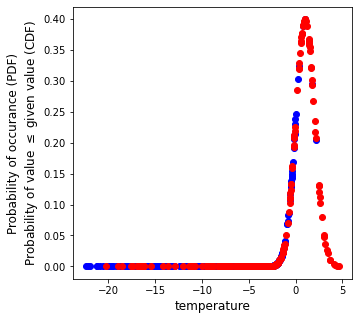

In [130]:
# Example of a log-normal distribution

# Make a plot figure
fig, axes = plt.subplots(figsize=(5,5))

# Plot the PDF
axes.plot(n_snowstay_temp, n_snowstay_temp_pdf, 'bo', lw=2, alpha=1, label='lognormal PDF')
axes.plot(n_snowload_temp, n_snowload_temp_pdf, 'ro', lw=2, alpha=1, label='lognormal PDF')

# Add axes labels
axes.set_xlabel('temperature', fontsize=12)
axes.set_ylabel('Probability of occurance (PDF)\nProbability of value $\leq$ given value (CDF)', fontsize=12)
# Add a title
ax.set_title('Normal Distribution', fontsize=15, fontweight='bold');

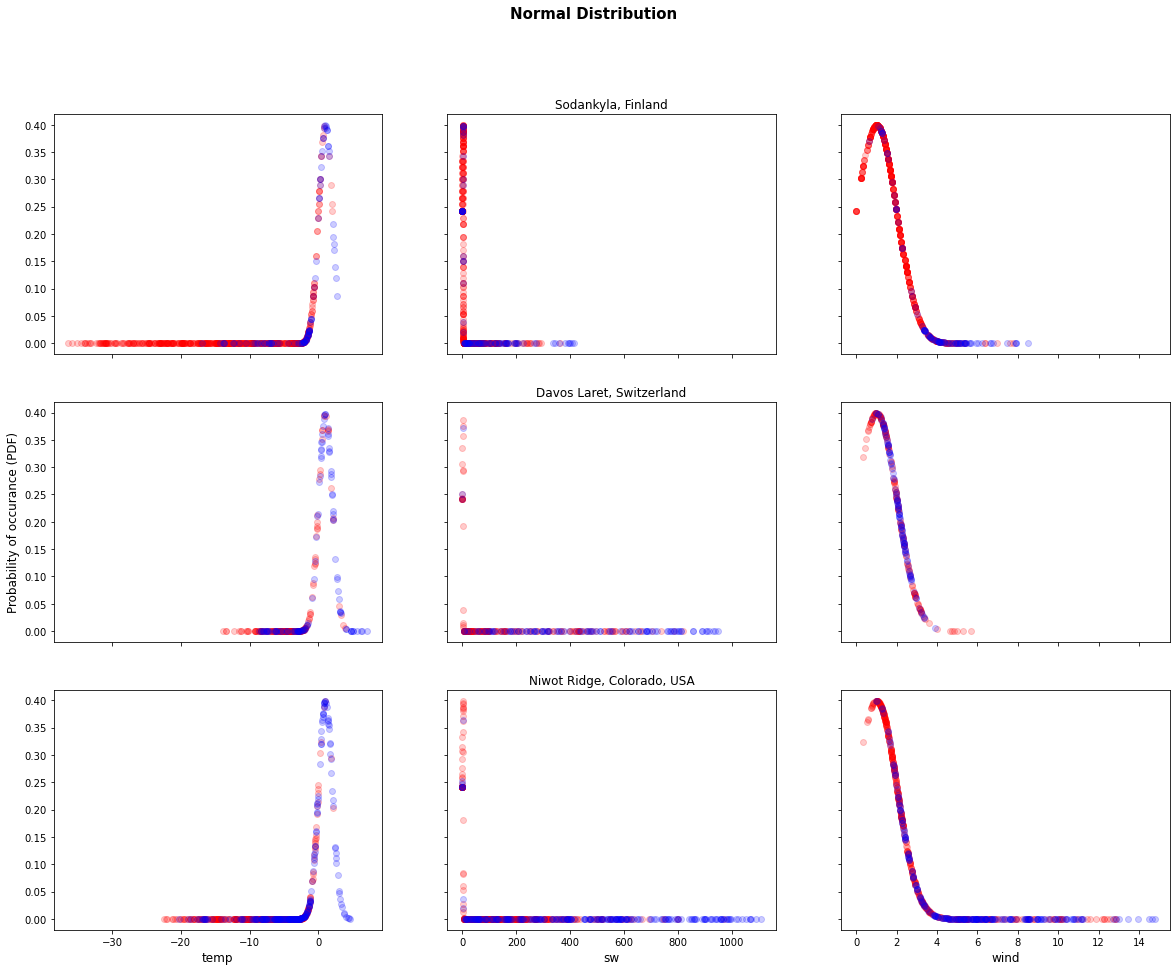

In [131]:
# Example of a log-normal distribution
lw=1
alpha=.2

# Make a plot figure
fig, axes = plt.subplots(3,3,figsize=(20,15), sharex='col', sharey='row')

# Plot the PDF
# sod 
axes[0,0].plot(s_snowstay_temp, s_snowstay_temp_pdf, 'ro', lw=lw, alpha=alpha, label='snow staying')
axes[0,0].plot(s_snowload_temp, s_snowload_temp_pdf, 'bo', lw=lw, alpha=alpha, label='snow unloading')

axes[0,1].plot(s_snowstay_swrd, s_snowstay_swrd_pdf, 'ro', lw=lw, alpha=alpha, label='')
axes[0,1].plot(s_snowload_swrd, s_snowload_swrd_pdf, 'bo', lw=lw, alpha=alpha, label='')

axes[0,2].plot(s_snowstay_wind, s_snowstay_wind_pdf, 'ro', lw=lw, alpha=alpha, label='')
axes[0,2].plot(s_snowload_wind, s_snowload_wind_pdf, 'bo', lw=lw, alpha=alpha, label='')

# laret 
axes[1,0].plot(l_snowstay_temp, l_snowstay_temp_pdf, 'ro', lw=lw, alpha=alpha, label='snow staying')
axes[1,0].plot(l_snowload_temp, l_snowload_temp_pdf, 'bo', lw=lw, alpha=alpha, label='snow unloading')

axes[1,1].plot(l_snowstay_swrd, l_snowstay_swrd_pdf, 'ro', lw=lw, alpha=alpha, label='')
axes[1,1].plot(l_snowload_swrd, l_snowload_swrd_pdf, 'bo', lw=lw, alpha=alpha, label='')

axes[1,2].plot(l_snowstay_wind, l_snowstay_wind_pdf, 'ro', lw=lw, alpha=alpha, label='')
axes[1,2].plot(l_snowload_wind, l_snowload_wind_pdf, 'bo', lw=lw, alpha=alpha, label='')

# niwot 
axes[2,0].plot(n_snowstay_temp, n_snowstay_temp_pdf, 'ro', lw=lw, alpha=alpha, label='snow staying')
axes[2,0].plot(n_snowload_temp, n_snowload_temp_pdf, 'bo', lw=lw, alpha=alpha, label='snow unloading')

axes[2,1].plot(n_snowstay_swrd, n_snowstay_swrd_pdf, 'ro', lw=lw, alpha=alpha, label='')
axes[2,1].plot(n_snowload_swrd, n_snowload_swrd_pdf, 'bo', lw=lw, alpha=alpha, label='')

axes[2,2].plot(n_snowstay_wind, n_snowstay_wind_pdf, 'ro', lw=lw, alpha=alpha, label='')
axes[2,2].plot(n_snowload_wind, n_snowload_wind_pdf, 'bo', lw=lw, alpha=alpha, label='')

# Add axes labels
axes[2,0].set_xlabel('temp', fontsize=12)
axes[2,1].set_xlabel('sw', fontsize=12)
axes[2,2].set_xlabel('wind', fontsize=12)

axes[0,1].set_title(namesod)
axes[1,1].set_title(namelaret)
axes[2,1].set_title(nameniwot)

axes[1,0].set_ylabel('Probability of occurance (PDF)', fontsize=12)

# Add a title
fig.suptitle('Normal Distribution', fontsize=15, fontweight='bold');

In [132]:
n_snowstay_temp_pdf.sum()

5.680164733359561

In [133]:
n_snowstay_swrd_pdf.sum()

13.95588260586807

In [134]:
n_snowstay_wind_pdf.sum()

81.16417220384125

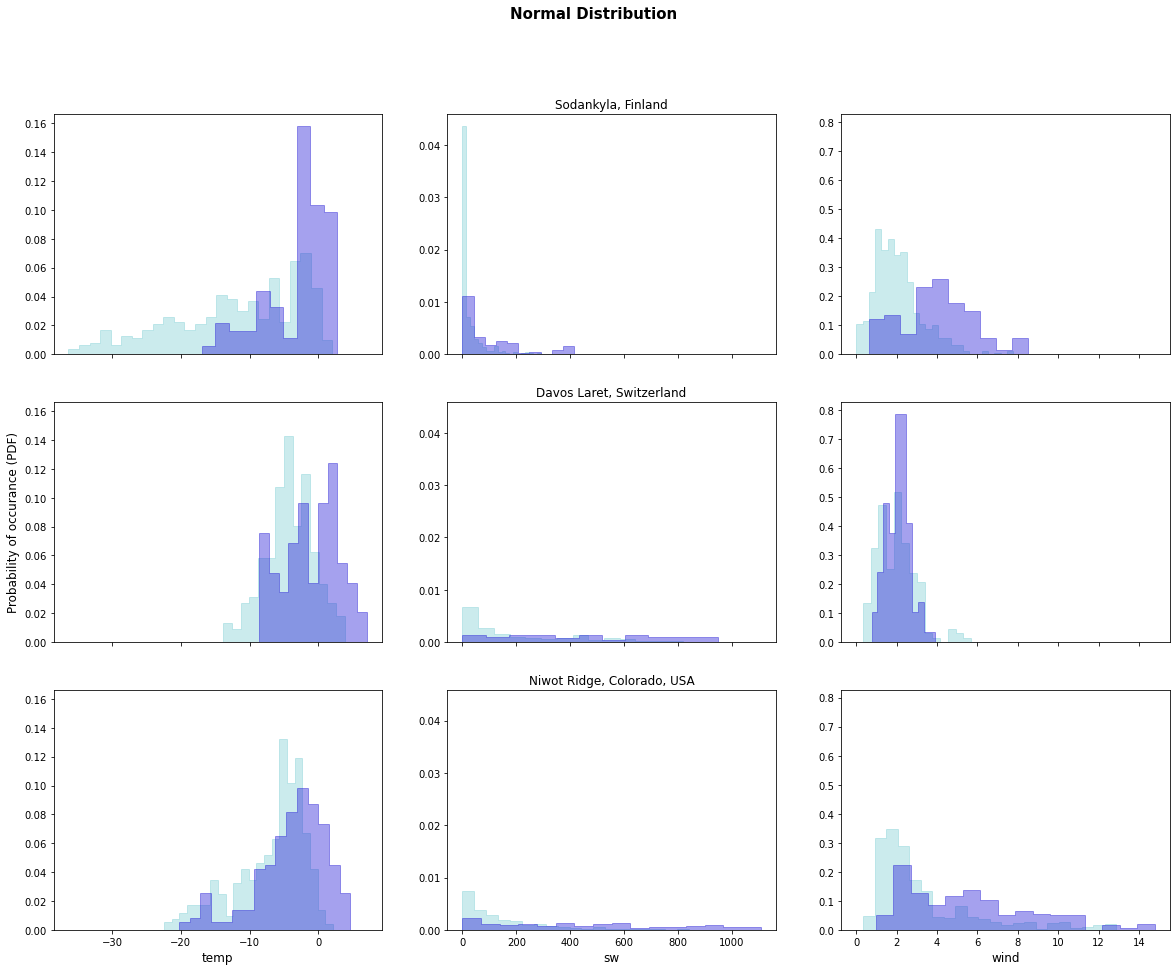

In [145]:
# Example of a log-normal distribution
lw=1
alpha=.4
histtype = 'stepfilled'
# histtype = 'step'

# Make a plot figure
fig, axes = plt.subplots(3,3,figsize=(20,15), sharex='col', sharey='col')

# Plot the PDF
# sod 
axes[0,0].hist(s_snowstay_temp, bins='sqrt', density=True, edgecolor=colorsnow,       histtype=histtype, color=colorsnow, alpha=alpha)
axes[0,0].hist(s_snowload_temp, bins='sqrt', density=True, edgecolor=colorsnowunload, histtype=histtype, color=colorsnowunload, alpha=alpha)

axes[0,1].hist(s_snowstay_swrd, bins='sqrt', density=True, edgecolor=colorsnow,       histtype=histtype, color=colorsnow, alpha=alpha)
axes[0,1].hist(s_snowload_swrd, bins='sqrt', density=True, edgecolor=colorsnowunload, histtype=histtype, color=colorsnowunload, alpha=alpha)

axes[0,2].hist(s_snowstay_wind, bins='sqrt', density=True, edgecolor=colorsnow,       histtype=histtype, color=colorsnow, alpha=alpha)
axes[0,2].hist(s_snowload_wind, bins='sqrt', density=True, edgecolor=colorsnowunload, histtype=histtype, color=colorsnowunload, alpha=alpha)


# laret
axes[1,0].hist(l_snowstay_temp, bins='sqrt', density=True, edgecolor=colorsnow,       histtype=histtype, color=colorsnow, alpha=alpha)
axes[1,0].hist(l_snowload_temp, bins='sqrt', density=True, edgecolor=colorsnowunload, histtype=histtype, color=colorsnowunload, alpha=alpha)

axes[1,1].hist(l_snowstay_swrd, bins='sqrt', density=True, edgecolor=colorsnow,       histtype=histtype, color=colorsnow, alpha=alpha)
axes[1,1].hist(l_snowload_swrd, bins='sqrt', density=True, edgecolor=colorsnowunload, histtype=histtype, color=colorsnowunload, alpha=alpha)

axes[1,2].hist(l_snowstay_wind, bins='sqrt', density=True, edgecolor=colorsnow,       histtype=histtype, color=colorsnow, alpha=alpha)
axes[1,2].hist(l_snowload_wind, bins='sqrt', density=True, edgecolor=colorsnowunload, histtype=histtype, color=colorsnowunload, alpha=alpha)


# niwot
axes[2,0].hist(n_snowstay_temp, bins='sqrt', density=True, edgecolor=colorsnow,       histtype=histtype, color=colorsnow, alpha=alpha)
axes[2,0].hist(n_snowload_temp, bins='sqrt', density=True, edgecolor=colorsnowunload, histtype=histtype, color=colorsnowunload, alpha=alpha)

axes[2,1].hist(n_snowstay_swrd, bins='sqrt', density=True, edgecolor=colorsnow,       histtype=histtype, color=colorsnow, alpha=alpha)
axes[2,1].hist(n_snowload_swrd, bins='sqrt', density=True, edgecolor=colorsnowunload, histtype=histtype, color=colorsnowunload, alpha=alpha)

axes[2,2].hist(n_snowstay_wind, bins='sqrt', density=True, edgecolor=colorsnow,       histtype=histtype, color=colorsnow, alpha=alpha)
axes[2,2].hist(n_snowload_wind, bins='sqrt', density=True, edgecolor=colorsnowunload, histtype=histtype, color=colorsnowunload, alpha=alpha)



# Add axes labels
axes[2,0].set_xlabel('temp', fontsize=12)
axes[2,1].set_xlabel('sw', fontsize=12)
axes[2,2].set_xlabel('wind', fontsize=12)

axes[0,1].set_title(namesod)
axes[1,1].set_title(namelaret)
axes[2,1].set_title(nameniwot)

axes[1,0].set_ylabel('Probability of occurance (PDF)', fontsize=12)

# Add a title
fig.suptitle('Normal Distribution', fontsize=15, fontweight='bold');